In [4]:
import pandas as pd
import numpy as np

# 1번 데이터 선정
pima = pd.read_csv('../csv 파일 모음/diabetes (3).csv')

In [7]:
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


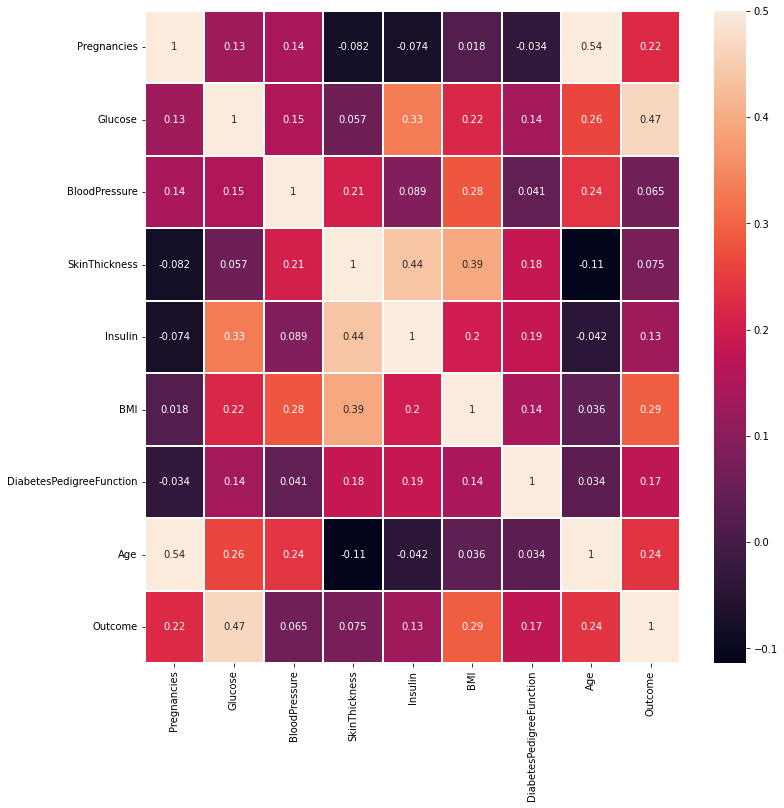

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

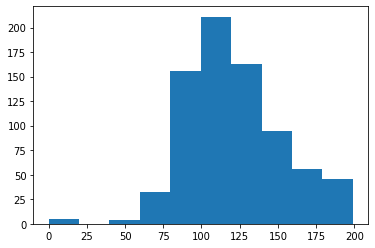

In [47]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(pima.corr(),linewidths=0.1, vmax=0.5, linecolor='white', annot=True)
plt.show()
plt.hist(pima['Glucose'],bins=10)


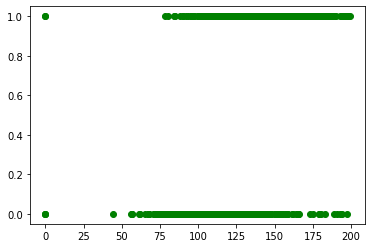

In [48]:
plt.scatter(pima['Glucose'], pima['Outcome'], c='green')
plt.show()

In [8]:
# feature 및 label 값 지정
X = pima.drop('Outcome', axis =1)
y = pima['Outcome']

In [17]:
# 교차검증 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier

pima_clf = DecisionTreeClassifier(random_state=156) 

scores = cross_val_score(pima_clf, X, y, scoring='accuracy', cv=5)

print('교차 검증별 정확도 : ', np.round(scores, 4)) 
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))


교차 검증별 정확도 :  [0.7208 0.6883 0.6623 0.7778 0.7451]
평균 검증 정확도 :  0.7189


In [51]:
# 스레드 홀드 별 테스트 결과

from sklearn.preprocessing import Binarizer 
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장.
thresholds = [0.1, 0.2 , 0.3, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    
    #threshold list 객체 내 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.1
오차행렬
[[33 67]
 [ 2 52]]
정확도: 0.5519, 정밀도: 0.4370, 재현율: 0.9630, f1score: 0.6012
임계값: 0.2
오차행렬
[[60 40]
 [ 9 45]]
정확도: 0.6818, 정밀도: 0.5294, 재현율: 0.8333, f1score: 0.6475
임계값: 0.3
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, f1score: 0.6667
임계값: 0.4
오차행렬
[[84 16]
 [23 31]]
정확도: 0.7468, 정밀도: 0.6596, 재현율: 0.5741, f1score: 0.6139
임계값: 0.45
오차행렬
[[86 14]
 [28 26]]
정확도: 0.7273, 정밀도: 0.6500, 재현율: 0.4815, f1score: 0.5532
임계값: 0.5
오차행렬
[[89 11]
 [29 25]]
정확도: 0.7403, 정밀도: 0.6944, 재현율: 0.4630, f1score: 0.5556
임계값: 0.55
오차행렬
[[93  7]
 [29 25]]
정확도: 0.7662, 정밀도: 0.7812, 재현율: 0.4630, f1score: 0.5814
임계값: 0.6
오차행렬
[[93  7]
 [32 22]]
정확도: 0.7468, 정밀도: 0.7586, 재현율: 0.4074, f1score: 0.5301


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# 오차행렬(정확도 정밀도 재현율 f1점수) 불러오는 함수 정의
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1score: {3:.4f}'.format(accuracy, precision, recall, f1score))

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(y)
y= labels

# 오차행렬 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


# predict_proba 의 출력은 각 클래스에 대한 확률
pred_proba = lr_clf.predict_proba(X_test)
pred1 = lr_clf.predict(X_test)


print("###################################")
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

# 예측 확률 array 와 예측 결과가 array를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis = 1)
print(' 두 개의 class 중 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])


오차행렬
[[89 11]
 [29 25]]
정확도: 0.7403, 정밀도: 0.6944, 재현율: 0.4630, f1score: 0.5556
###################################
pred_proba()결과 shape : (154, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.95083714 0.04916286]
 [0.82340455 0.17659545]
 [0.91998341 0.08001659]]
 두 개의 class 중 더 큰 확률을 클래스 값으로 예측: 
 [[0.95083714 0.04916286 0.        ]
 [0.82340455 0.17659545 0.        ]
 [0.91998341 0.08001659 0.        ]]


c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X)[:, 1]

# 실제값 데이터 셋과 데이블 값이 1일때 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y, pred_proba_class1)
print('반환된 분류 결정 임곘값 배열의 shape', thresholds.shape)
print('반환된 precisions 배열의 shape', precisions.shape)
print('반환된 recalls 배열의 shape', recalls.shape)



반환된 분류 결정 임곘값 배열의 shape (768,)
반환된 precisions 배열의 shape (769,)
반환된 recalls 배열의 shape (769,)


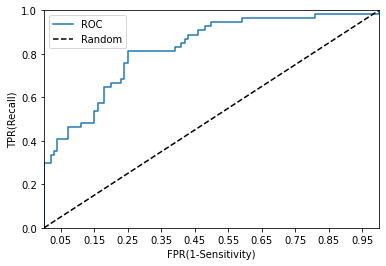

In [42]:
#[그래프 하나 더]
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X축의 scale을 0.1 단위로 변경, X, Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
roc_curve_plot(y_test, pred_proba_class1)